<a href="https://colab.research.google.com/github/ubbbeee/Course-4B-Deep-Learning-Fo-Computer-Vision/blob/main/4B_Assignment_Deep_Learning_for_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Computer Vision Group 15
### 1. Muhamad Tio Ariyanto (Universitas Pendidikan Indonesia)
### 2. Aji Muhammad Zapar (Universitas Pendidikan Indonesia)
### 3. Alfen Fajri Nurulhaq (Universitas Pendidikan Indonesia)
### 4. Shabrina Herawati (Universitas Muhammadiyah Karanganyar)
### 5. Niswa Alfiyya (Universitas Pendidikan Indonesia)
### 6. Farhan Ijaz Khan (University of Swabi)
### 7. Zubair Ahmad (University of Swabi)

## Import All Utilities and Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
from google.colab import drive
import os

## Mount To Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Define Directory Paths

In [ ]:
drive.mount('/content/drive')
data_train_dir = '/content/drive/MyDrive/tomato/train/'
data_train_dir = pathlib.Path(data_train_dir)
data_test_dir = '/content/drive/MyDrive/tomato/test/'
data_test_dir = pathlib.Path(data_test_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Count Image in Training Dataset

In [ ]:
# jumlah instance train dataset
image_count_jpg = len(list(data_train_dir.glob('*/*.JPG')))
image_count_png = len(list(data_train_dir.glob('*/*.png')))
image_count_jpeg = len(list(data_train_dir.glob('*/*.jpeg')))
image_count = image_count_jpg + image_count_png + image_count_jpeg
print(image_count)

14980


## Count Image in Test Dataset

In [ ]:
# jumlah instance test dataset
image_count_jpg = len(list(data_test_dir.glob('*/*.JPG')))
image_count_png = len(list(data_test_dir.glob('*/*.png')))
image_count_jpeg = len(list(data_test_dir.glob('*/*.jpeg')))
image_count = image_count_jpg + image_count_png + image_count_jpeg
print(image_count)

3741


## Count Number of Classes and Instances per Class For Train Dataset

In [ ]:
list_dir = [os.path.basename(x) for x in data_test_dir.iterdir() if x.is_dir()]
print("Number of classes: {} ".format(len(list_dir)))
print("Number of instances per class")

for x in list_dir:
    jpg_count = len(list(data_train_dir.glob('{}/*.JPG'.format(x))))
    png_count = len(list(data_train_dir.glob('{}/*.png'.format(x))))
    jpeg_count = len(list(data_train_dir.glob('{}/*.jpeg'.format(x))))
    total_count = jpg_count + png_count + jpeg_count
    print("{} = {}".format(x, total_count))

Number of classes: 10 
Number of instances per class
Tomato___Bacterial_spot = 1701
Tomato___Leaf_Mold = 800
Tomato___Septoria_leaf_spot = 1416
Tomato___healthy = 1271
Tomato___Late_blight = 1414
Tomato___Spider_mites Two-spotted_spider_mite = 1350
Tomato___Early_blight = 810
Tomato___Tomato_mosaic_virus = 800
Tomato___Tomato_Yellow_Leaf_Curl_Virus = 4295
Tomato___Target_Spot = 1123


## Count Number of Classes and Instances per Class For Test Dataset

In [ ]:
list_dir = [os.path.basename(x) for x in data_test_dir.iterdir() if x.is_dir()]
print("Jumlah class: {} ".format(len(list_dir)))
print("Jumlah instance per class")

for x in list_dir:
    jpg_count = len(list(data_test_dir.glob('{}/*.JPG'.format(x))))
    png_count = len(list(data_test_dir.glob('{}/*.png'.format(x))))
    jpeg_count = len(list(data_test_dir.glob('{}/*.jpeg'.format(x))))
    total_count = jpg_count + png_count + jpeg_count
    print("{} = {}".format(x, total_count))

Jumlah class: 10 
Jumlah instance per class
Tomato___Bacterial_spot = 426
Tomato___Leaf_Mold = 200
Tomato___Septoria_leaf_spot = 355
Tomato___healthy = 319
Tomato___Late_blight = 352
Tomato___Spider_mites Two-spotted_spider_mite = 336
Tomato___Early_blight = 200
Tomato___Tomato_mosaic_virus = 200
Tomato___Tomato_Yellow_Leaf_Curl_Virus = 1072
Tomato___Target_Spot = 281


## Load The Dataset of Train and Test

In [ ]:
# Load Train Dataset
train_images = tf.keras.preprocessing.image_dataset_from_directory(
    data_train_dir,
    image_size=(128, 128),
    batch_size=32,
)

# Load Test Dataset
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    data_test_dir,
    image_size=(128, 128),
    batch_size=32,
)

Found 15104 files belonging to 10 classes.
Found 3771 files belonging to 10 classes.


## Print Class Names from Training Dataset

In [ ]:
class_names = train_images.class_names
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


## Display Sample Images from Training Dataset

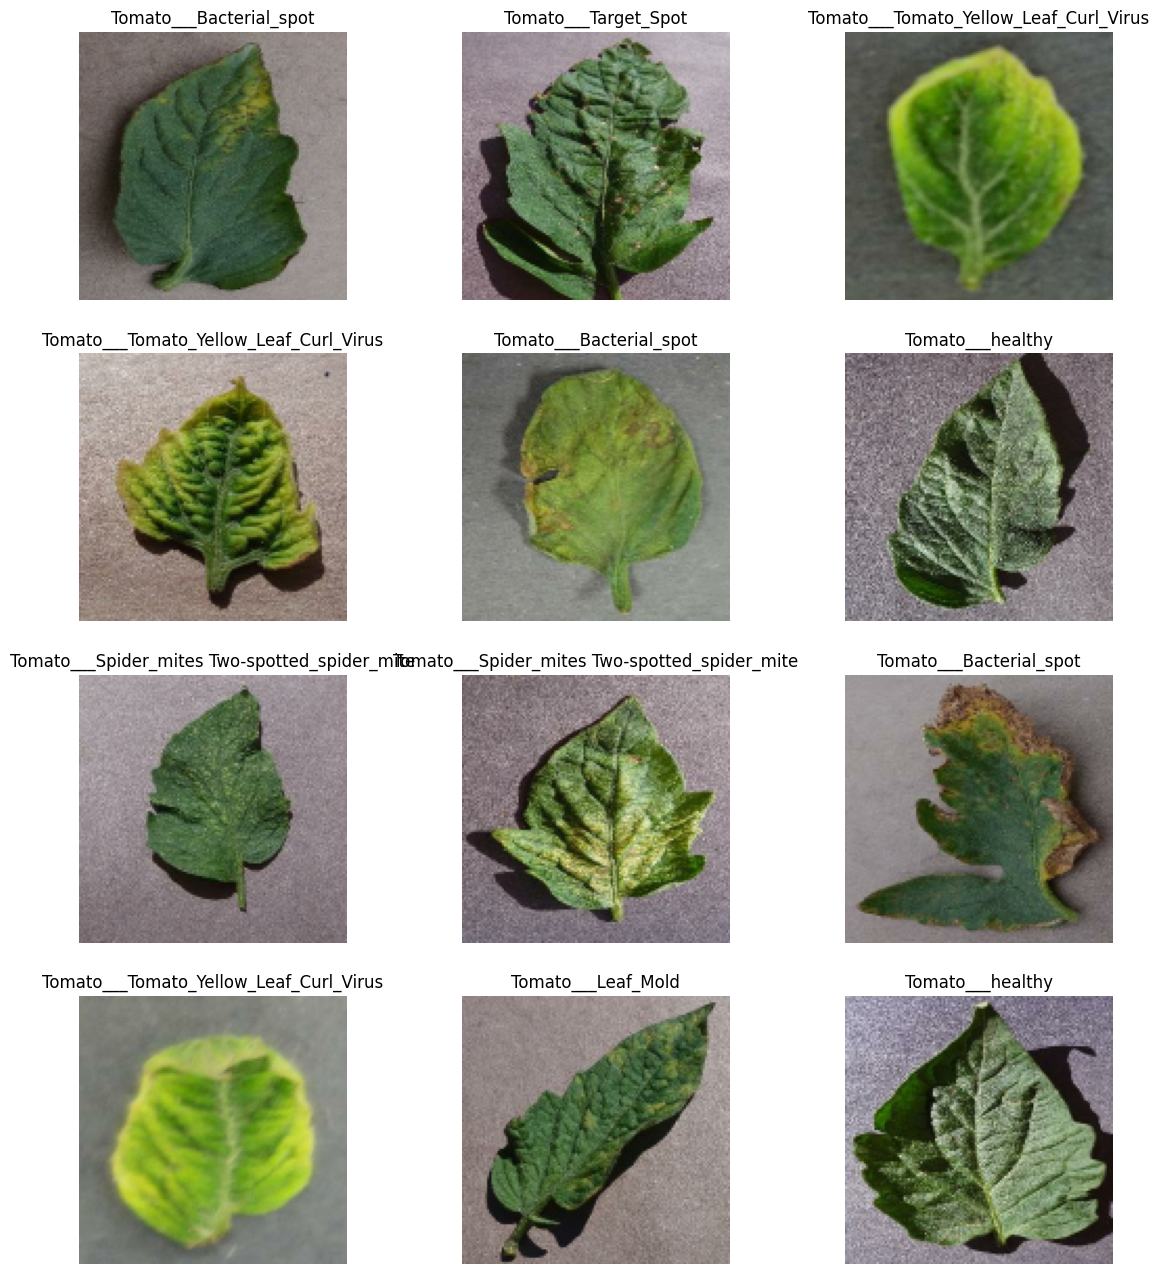

In [ ]:
plt.figure(figsize=(14, 16))
for images, labels in train_images.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1) # 4 row, 3 column
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Print Shape of Image and Label Batches

In [ ]:
for image_batch, labels_batch in train_images:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


## Normalize RGB Values and Print Min/Max

In [ ]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_images.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))

0.0 0.72647065


## Define CNN Model Architecture

In [ ]:
num_classes = len(class_names)
model = Sequential([
layers.Rescaling(1./255, input_shape=(128, 128, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)
])

## Compile the Model

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

## Display model summary showing layer configurations and parameters

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

## Train the model on training data with specified number of epochs and validate on test data.

In [ ]:
epochs=5
history = model.fit(
train_images,
validation_data=test_images,
epochs=epochs
)

Epoch 1/5
472/472 [==============================] - 91s 190ms/step - loss: 0.9681 - accuracy: 0.6703 - val_loss: 0.6053 - val_accuracy: 0.7942
Epoch 2/5
472/472 [==============================] - 45s 94ms/step - loss: 0.3958 - accuracy: 0.8642 - val_loss: 0.3213 - val_accuracy: 0.8915
Epoch 3/5
472/472 [==============================] - 45s 95ms/step - loss: 0.2566 - accuracy: 0.9138 - val_loss: 0.2869 - val_accuracy: 0.9037
Epoch 4/5
472/472 [==============================] - 45s 95ms/step - loss: 0.1804 - accuracy: 0.9391 - val_loss: 0.2822 - val_accuracy: 0.9072
Epoch 5/5
472/472 [==============================] - 45s 94ms/step - loss: 0.1329 - accuracy: 0.9562 - val_loss: 0.2319 - val_accuracy: 0.9250


## Visualize training and validation accuracy along with training and validation loss over epochs

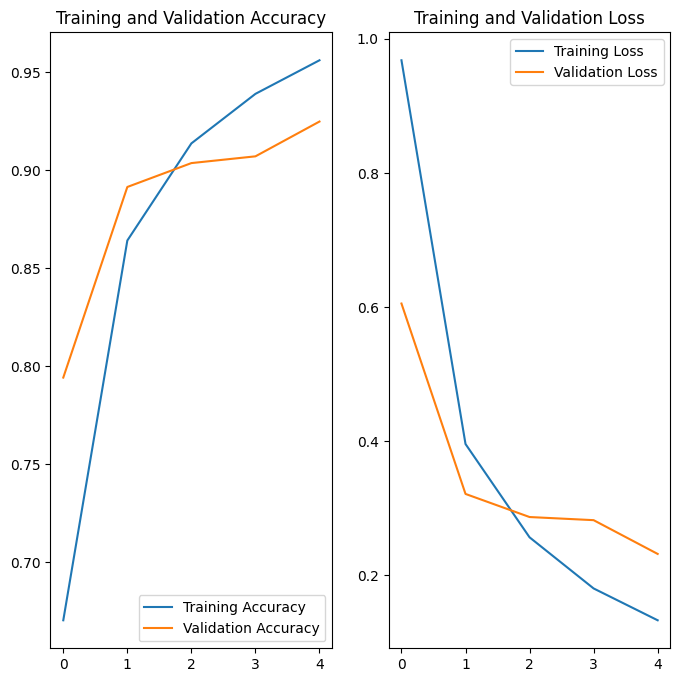

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Define data augmentation pipeline for training images including horizontal flipping, rotation, and zoom.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(128, 128, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

## Display augmented images from the training dataset using the defined data augmentation pipeline.

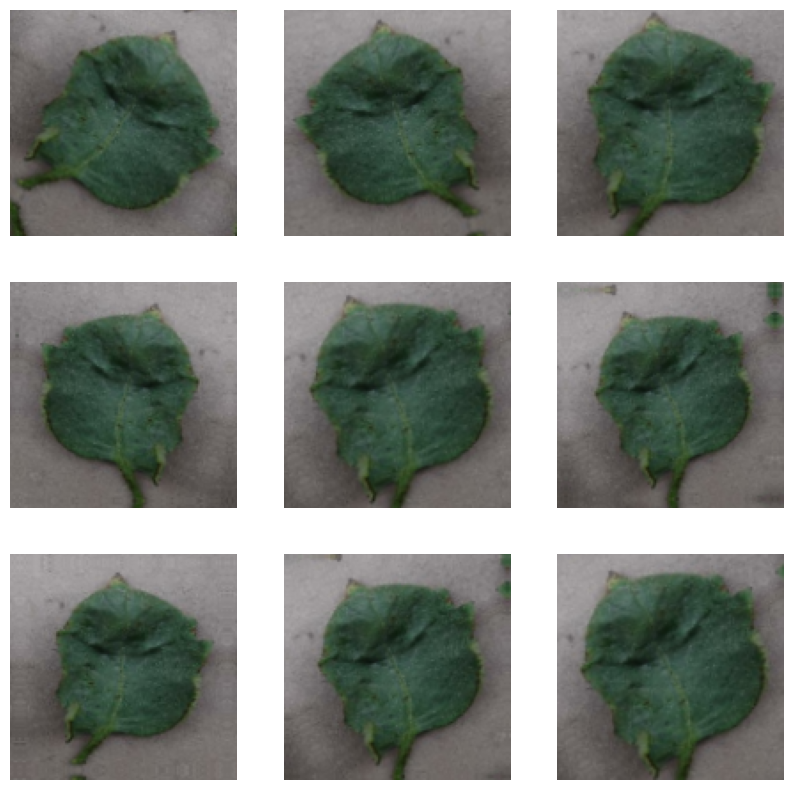

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_images.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Define a convolutional neural network (CNN) model incorporating data augmentation, normalization, convolutional layers, pooling layers, dropout regularization, and dense layers for classification.

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compile the model with Adam optimizer, Sparse Categorical Crossentropy loss function, and accuracy metric

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

## Train the model on training data with specified number of epochs and validate on test data.

In [ ]:
epochs = 5
history = model.fit(
train_images,
validation_data=test_images,
epochs=epochs
)

Epoch 1/5
472/472 [==============================] - 47s 95ms/step - loss: 1.0289 - accuracy: 0.6486 - val_loss: 0.8234 - val_accuracy: 0.7218
Epoch 2/5
472/472 [==============================] - 46s 96ms/step - loss: 0.5085 - accuracy: 0.8208 - val_loss: 0.6337 - val_accuracy: 0.7894
Epoch 3/5
472/472 [==============================] - 44s 93ms/step - loss: 0.4063 - accuracy: 0.8626 - val_loss: 0.5161 - val_accuracy: 0.8168
Epoch 4/5
472/472 [==============================] - 45s 94ms/step - loss: 0.2987 - accuracy: 0.8966 - val_loss: 0.3318 - val_accuracy: 0.8804
Epoch 5/5
472/472 [==============================] - 45s 94ms/step - loss: 0.2759 - accuracy: 0.9023 - val_loss: 0.6083 - val_accuracy: 0.8136


## Visualize training and validation accuracy along with training and validation loss over epochs

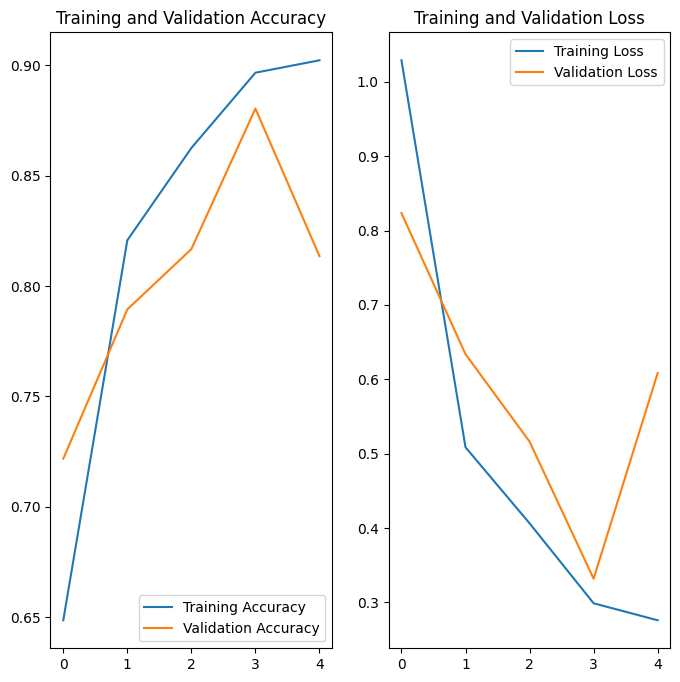

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Save model to file 'model_tomato'
model.save('/content/drive/MyDrive/model_tomato', save_format='tf')


In [ ]:
import pickle

# Save history training to file 'history_model.pkl'
with open('/content/drive/MyDrive/history_model.pkl', 'wb') as file:
    pickle.dump(history.history, file)


## Conclusion
The CNN model developed for classifying tomato images demonstrated significant learning and improvement throughout the training process. Starting from an initial accuracy of 64.86% on training and 72.18% on validation, the model showed consistent enhancement, achieving a final training accuracy of 90.23% and validation accuracy of 81.36% after five epochs. The decreasing loss values further validate the model's effectiveness in learning from the data. This performance indicates that the model effectively learned to classify tomato images, showcasing its potential for practical application in image classification tasks.

Model Architecture
The model used in this project is a Convolutional Neural Network (CNN) with the following architecture:


1.   Data Augmentation Layer: Includes horizontal flipping, rotation, and zoom to
enhance the variety of training data.
2.   Normalization Layer: Rescaling pixel values from [0, 255] to [0, 1].
3.   Convolutional Layers: Three convolutional layers with filter sizes of 16, 32, and 64, respectively, with 3x3 kernels, followed by ReLU activation and MaxPooling.
4.   Dropout Layer: A dropout layer with a dropout rate of 0.2 to prevent overfitting.
5. Dense Layers: A dense layer with 128 units and ReLU activation, followed by an output layer with a softmax activation corresponding to the number of classes.

Techniques Used
Several techniques were employed to enhance model performance:

1. Data Augmentation: Used to increase the diversity of the training data, helping the model become more robust to variations in real-world data.
2. Batch Normalization: While not directly applied in this example, batch normalization can help speed up training and improve the stability of the network if used.
3. Dropout: Applied to reduce overfitting by randomly dropping units from the network during training, making the model more generalizable.

Results
The model was trained for 5 epochs with the following results:

- Epoch 1:
  - Loss: 1.0289,
  - Accuracy: 64.86%
  - Validation Loss: 0.8234,
  - Validation Accuracy: 72.18%
- Epoch 2:
  - Loss: 0.5085,
  - Accuracy: 82.08%
  - Validation Loss: 0.6337,
  - Validation Accuracy: 78.94%
- Epoch 3:
  - Loss: 0.4063,
  - Accuracy: 86.26%
  - Validation Loss: 0.5161,
  - Validation Accuracy: 81.68%
- Epoch 4:
  - Loss: 0.2987,
  - Accuracy: 89.66%
  - Validation Loss: 0.3318,
  - Validation Accuracy: 88.04%
- Epoch 5:
  - Loss: 0.2759,
  - Accuracy: 90.23%
  - Validation Loss: 0.6083,
  - Validation Accuracy: 81.36%

Impact of Techniques
- Data Augmentation: Helped the model generalize better by increasing the variety of data seen during training.
- Dropout: Reduced overfitting, making the model perform better on unseen validation data.
- Batch Normalization: Although not used in this project, batch normalization could enhance training stability and speed if applied.